In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("./GerekliVeriler.CSV/original.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
sd =pd.read_csv("./GerekliVeriler.CSV/original.csv")
sd = sd[['TV','radio','newspaper','sales']]
sd.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [4]:
import seaborn as sns
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X=df[["TV"]]

In [7]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [8]:
y = df[["sales"]]

In [9]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [10]:
reg= LinearRegression()

In [11]:
model = reg.fit(X,y)

In [12]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,\n         normalize=False)'

In [14]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [15]:
#coef -- katsayı  --> B1
#intercept -- sabit--> Bo

In [16]:
model.intercept_

array([7.03259355])

In [17]:
model.coef_

array([[0.04753664]])

In [18]:
#rkare--> """Bağımlı değişkendeki değişikliğin bağımsız değişkenlerce açıklanma yüzdesidir."""
model.score(X,y)

0.611875050850071

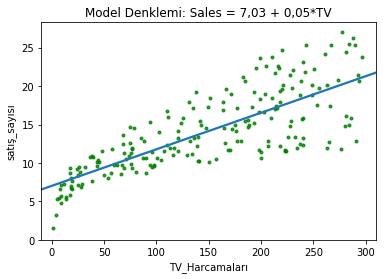

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt 
g = sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':"g",'s':9})
g.set_title("Model Denklemi: Sales = 7,03 + 0,05*TV" )
g.set_ylabel("satış_sayısı")
g.set_xlabel("TV_Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

Model denilen yukarıdaki fonksionu bulmak.

Tahmin ise bulunan bu fonksiyon ile çıktılar üretmektir.

In [20]:
#Denklem kurulduktan sonra değeri denklemdeki yerine koyduğumuzda sonuç çıkacaktır.

 Sales = 7,03 + 0,05*TV

In [21]:
 Sales = 7.03 + 0.05*165

In [22]:
Sales

15.280000000000001

Yukarıda yapılan yöntem el yordamı ile yapılmıştır. Bunu proğramatik bir yaklaşımla yaptığımız zamanda scikit yönteminden yaralanırız.Buda aşağıda verilmiştir.

In [23]:
model.predict([[165]])

array([[14.87613922]])

In [24]:
yeni_veri= [[5],[15],[30]]

In [25]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

# Artıklar ve Makine Öğrenmesindeki Önemi

MSE: Hata Karelerin Ortalaması

RMSE: Hata Karelerin Ortalamasının Karekökü

In [26]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [36]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [40]:
gerçek_y=y[0:10]

In [39]:
tahmin_edilen_y=pd.DataFrame(model.predict(X)[0:10])

In [41]:
hatalar= pd.concat([gerçek_y,tahmin_edilen_y],axis=1)

In [43]:
hatalar.columns=["gerçek_y","tahmin_edilen_y"]

In [44]:
hatalar

,gerçek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [45]:
hatalar["hata"]=hatalar["gerçek_y"]-hatalar["tahmin_edilen_y"]

In [46]:
hatalar

,gerçek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [47]:
hatalar["hata_kareler"]=hatalar["hata"]**2

In [48]:
hatalar

,gerçek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [50]:
np.mean(hatalar["hata_kareler"])

9.290350329638105